# Initial Guesses for Trajectory Optimisation

In [1]:
import sys; sys.path.append('../')

# In this example a direct trapezoidal transcription
# trajectory optimisation problem is given a guess
from Trajectory import Point_Lander
from Optimisation import Trapezoidal

In [2]:
# Instantiate a dynamical model and look at details
Model = Point_Lander()

In [3]:
# Create a trajectory optimisation problem and look at details
Problem = Trapezoidal(Model, nsegs=50)

In [4]:
# Guess from a ballistic (uncontrolled) trajectory
tf, state, control = Problem.Guess.Ballistic(tf=20, nlp=False)

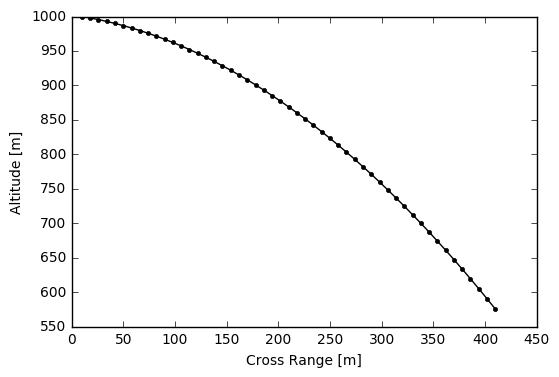

In [5]:
# Visualise the guess
import matplotlib.pyplot as plt
plt.plot(state[:,0], state[:,1], 'k.-') # Trajectory
plt.ylabel('Altitude [m]'); plt.xlabel('Cross Range [m]')
plt.show()

In [6]:
# Import PyGMO for optimisation
from PyGMO import *

In [7]:
# Use sequential least squares quadratic programming
algo = algorithm.scipy_slsqp(max_iter=3000, screen_output=True)

In [8]:
# Create an empty population space for individuals (decision vectors) to inhabit
pop = population(Problem)

In [9]:
# Provide a ballistic (uncontrolled) trajectory as an initial guess
zguess = Problem.Guess.Ballistic(tf=20)

In [10]:
# Add the guess to the population
pop.push_back(tuple(zguess))

In [11]:
# Evolve the individual with SLSQP
pop = algo.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   411    -9.500000E+03     1.000000E+00
    2   832    -9.500000E+03     1.000000E+00
    3  1250    -9.500000E+03     1.000000E+00
    4  1671    -9.500000E+03     1.000000E+00


../Trajectory.py:135: RuntimeWarning: divide by zero encountered in double_scalars
  x0 = self.T*u/m
../Optimisation.py:94: RuntimeWarning: invalid value encountered in add
  ceq += list(s[k+1] - s[k] - h/2.*(f1 + f2))


    5  2092    -9.500000E+03     1.000000E+00
    6  2513    -9.500000E+03     1.000000E+00
    7  2930    -9.500000E+03     1.000000E+00
    8  3347    -9.500000E+03     1.000000E+00
    9  3768    -9.500000E+03     1.000000E+00
   10  4189    -9.500000E+03     1.000000E+00
   11  4606    -9.500000E+03     1.000000E+00
   12  5027    -9.500000E+03     1.000000E+00
   13  5445    -9.500000E+03     1.000000E+00
   14  5861    -9.500000E+03     1.000000E+00
   15  6277    -9.500000E+03     1.000000E+00
   16  6695    -9.500000E+03     1.000000E+00
   17  7112    -9.500000E+03     1.000000E+00
   18  7533    -9.500000E+03     1.000000E+00
   19  7950    -9.500000E+03     1.000000E+00
   20  8366    -9.500000E+03     1.000000E+00
   21  8783    -9.500000E+03     1.000000E+00
   22  9200    -9.500000E+03     1.000000E+00
   23  9616    -9.500000E+03     1.000000E+00
   24 10032    -9.500000E+03     1.000000E+00
   25 10448    -9.500000E+03     1.000000E+00
   26 10864    -9.500000E+03     1

In [12]:
tf, s, c = Problem.Decode(pop.champion.x)

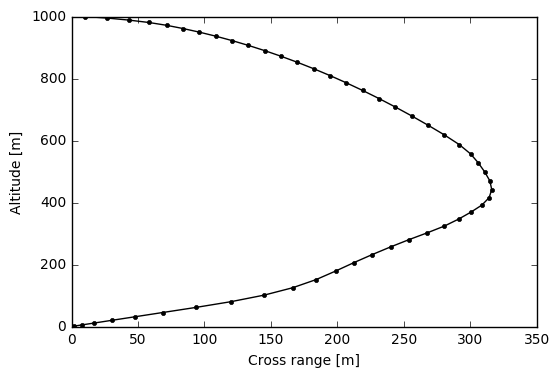

In [13]:
# x vs. y
plt.plot(s[:,0], s[:,1], 'k.-'); plt.xlabel('Cross range [m]'); plt.ylabel('Altitude [m]')
plt.show()

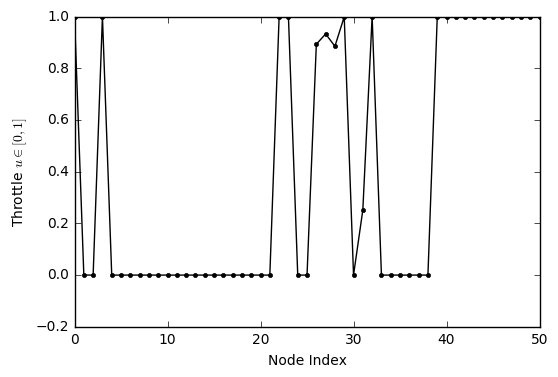

In [14]:
# Controls (note the bang-off-bang profile indicative of mass optimal control)
plt.plot(c[:,0], 'k.-'); plt.ylabel('Throttle $u \in [0,1]$'), plt.xlabel('Node Index')
plt.show()

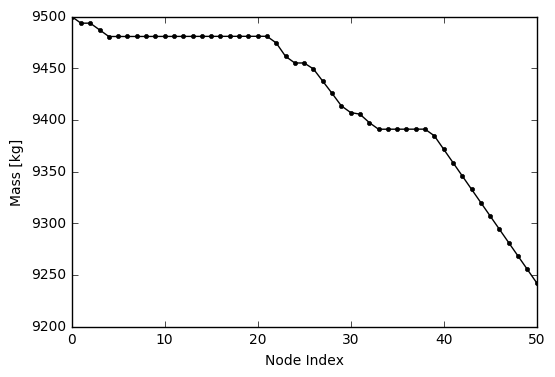

In [15]:
# Plot the propellent usage
plt.plot(s[:,4],'k.-'); plt.ylabel('Mass [kg]'); plt.xlabel('Node Index')
plt.show()

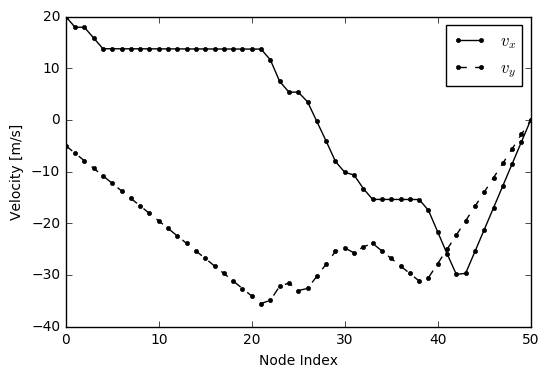

In [16]:
# Soft landing
plt.plot(s[:,2], 'k.-')
plt.plot(s[:,3], 'k.--')
plt.legend(['$v_x$', '$v_y$'])
plt.xlabel('Node Index')
plt.ylabel('Velocity [m/s]')
plt.show()